In [1]:
from keras_preprocessing.image import ImageDataGenerator
import tensorflow as tf
import matplotlib.pyplot as plt
import splitfolders
import os

In [2]:
base_path = r'C:\Users\Tegar\pa-kb-klasifikasi-pakaian\dataset'

In [3]:
splitfolders.ratio(
    base_path,
    output='split_dataset',
    ratio=(.8,.2)
)

Copying files: 10959 files [00:14, 764.29 files/s]


In [4]:
train_path = 'split_dataset/train'
validation_path = 'split_dataset/val'
os.listdir(validation_path)

['black_dress',
 'black_pants',
 'black_shirt',
 'black_shoes',
 'black_shorts',
 'blue_dress',
 'blue_pants',
 'blue_shirt',
 'blue_shoes',
 'blue_shorts',
 'brown_pants',
 'brown_shoes',
 'brown_shorts',
 'green_pants',
 'green_shirt',
 'green_shoes',
 'green_shorts',
 'red_dress',
 'red_pants',
 'red_shoes',
 'white_dress',
 'white_pants',
 'white_shoes']

In [15]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

validation_datagen = ImageDataGenerator(
    rescale=1./255
)

In [22]:
train_image = train_datagen.flow_from_directory(
    train_path,
    target_size=(200, 200),
    classes=['black_dress', 'black_pants', 'black_shirt', 'black_shoes', 'black_shorts',
    'blue_dress', 'blue_pants', 'blue_shirt', 'blue_shoes', 'blue_shorts',
    'brown_pants', 'brown_shoes', 'brown_shorts',
    'green_dress', 'green_pants', 'green_shirt', 'green_shoes', 'green_shorts',
    'red_dress', 'red_pants', 'red_shoes',
    'white_dress', 'white_pants', 'white_shoes', 'white_shorts'
    ],
    class_mode='categorical',
    batch_size=32
)

validation_image = validation_datagen.flow_from_directory(
    validation_path,
    target_size=(200, 200),
    classes=['black_dress', 'black_pants', 'black_shirt', 'black_shoes', 'black_shorts',
    'blue_dress', 'blue_pants', 'blue_shirt', 'blue_shoes', 'blue_shorts',
    'brown_pants', 'brown_shoes', 'brown_shorts',
    'green_dress', 'green_pants', 'green_shirt', 'green_shoes', 'green_shorts',
    'red_dress', 'red_pants', 'red_shoes',
    'white_dress', 'white_pants', 'white_shoes', 'white_shorts'],
    class_mode='categorical',
    batch_size=2
)

Found 8760 images belonging to 25 classes.
Found 2199 images belonging to 25 classes.


(32, 200, 200, 3)


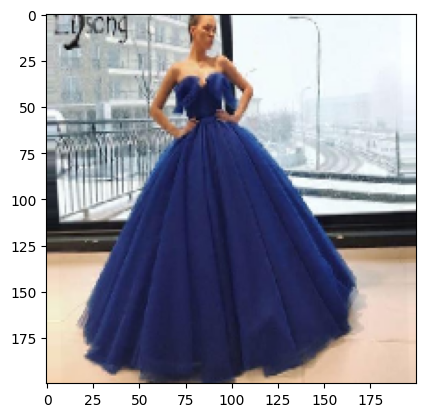

(32, 200, 200, 3)


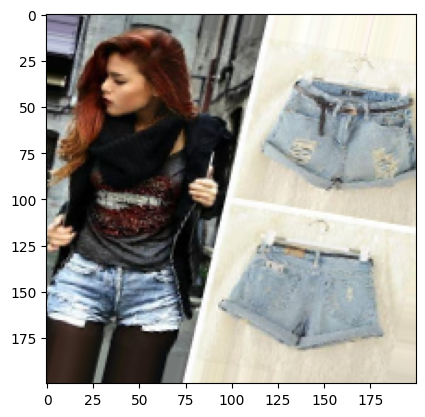

(32, 200, 200, 3)


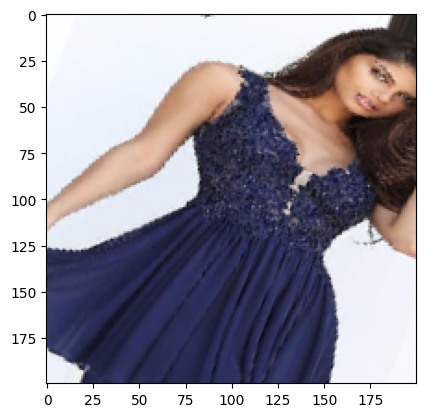

(32, 200, 200, 3)


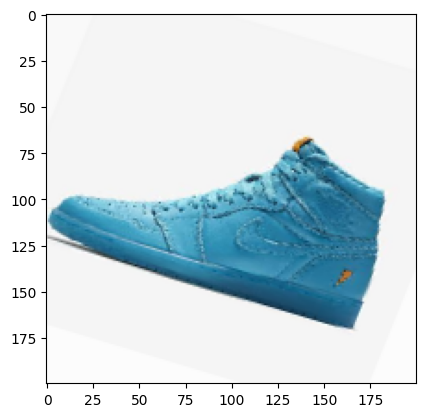

(32, 200, 200, 3)


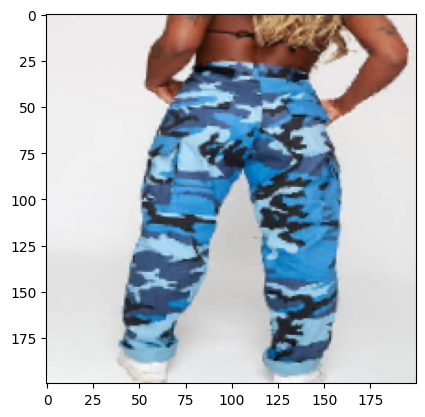

(32, 200, 200, 3)


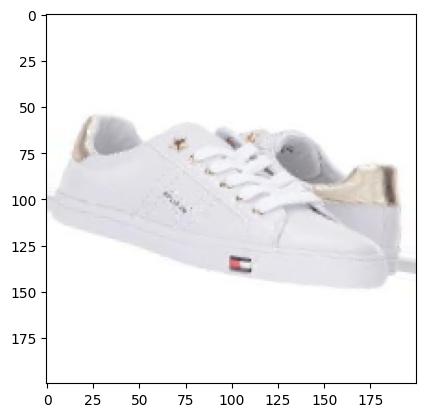

(32, 200, 200, 3)


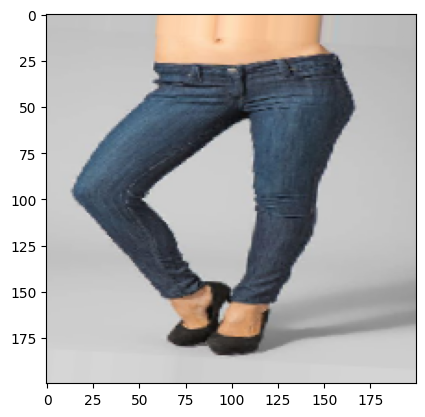

(32, 200, 200, 3)


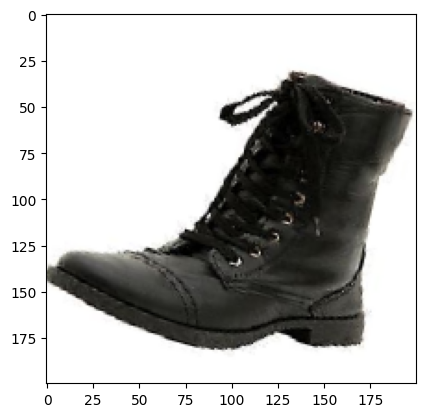

(32, 200, 200, 3)


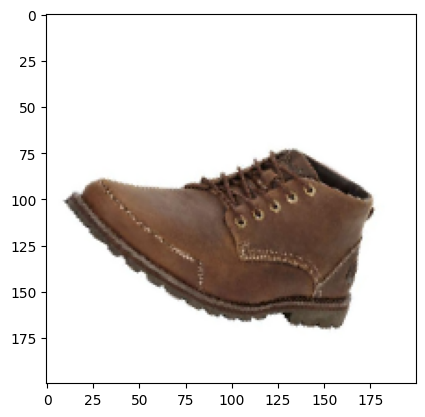

(32, 200, 200, 3)


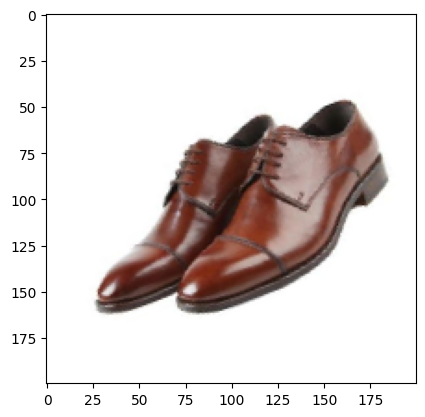

In [23]:
for _ in range(10):
    img, label = train_image.next()
    print(img.shape)
    plt.imshow(img[1])
    plt.show()

In [33]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=[200,200,3]),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(25, activation='softmax')
])

In [34]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 99, 99, 32)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 313632)            0         
                                                                 
 dense_8 (Dense)             (None, 64)                20072512  
                                                                 
 dense_9 (Dense)             (None, 25)                1625      
                                                                 
Total params: 20,075,033
Trainable params: 20,075,033
Non-trainable params: 0
__________________________________________

In [35]:
model.compile(
    optimizer='Adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [36]:
result = model.fit(
    train_image,
    epochs=25,
    validation_data=validation_image,
    steps_per_epoch=100
)

Epoch 1/25
100/100 [==============================] - 33s 329ms/step - loss: 4.5577 - accuracy: 0.2731 - val_loss: 1.6756 - val_accuracy: 0.5416
Epoch 2/25
100/100 [==============================] - 33s 334ms/step - loss: 1.4819 - accuracy: 0.5847 - val_loss: 1.2418 - val_accuracy: 0.6439
Epoch 3/25
100/100 [==============================] - 34s 344ms/step - loss: 1.2578 - accuracy: 0.6463 - val_loss: 1.1236 - val_accuracy: 0.6803
Epoch 4/25
100/100 [==============================] - 35s 347ms/step - loss: 1.0628 - accuracy: 0.6950 - val_loss: 0.9102 - val_accuracy: 0.7390
Epoch 5/25
100/100 [==============================] - 35s 350ms/step - loss: 1.0129 - accuracy: 0.6875 - val_loss: 0.9068 - val_accuracy: 0.7335
Epoch 6/25
100/100 [==============================] - 35s 349ms/step - loss: 0.9360 - accuracy: 0.7113 - val_loss: 0.8403 - val_accuracy: 0.7458
Epoch 7/25
100/100 [==============================] - 35s 348ms/step - loss: 0.8723 - accuracy: 0.7250 - val_loss: 0.7583 - val_ac